# Introduction  Business Objective and Problem

## Suitable Locations for New Retail store for Health Nutrition in City of London

**Description of Problem**  
A client is planning to introduce their chain of stores which specializes in health based nutrition products, ranging from food supplements, vitamins, meal plans, juices, etc. They will be carrying out detail on ground market research activity to decide the exact target location of their stores, but for initial feasibility they need to narrow down the broader target neighborhood where they can start their kick start their detail market sizing/feasibility activity. For this purpose they have request to identify the neighborhoods in London which have higher concentration of population which will be interested in their product offering. Without utilizing existing public data the company could end up spending a large amount of money on ground market research encompassing the whole city.    


**Criteria**  
The client has already communicated that generally their stores are located in proximity to areas which have higher concentration of other facilities providing services to health/fitness enthusiasts. For this purpose we will be using London City Borough data (available on Wikipedia) and map it through FOURSQUARE to find out concentration of facilities which are of interest to health/fitness conscious people. And based on this analysis the suitable neighborhoods will be recommended to the client to initiate their detail on-ground market research.
 






# DATA Section




**List of London Boroughs**  

information on boroughs and their population & coordinates  
-Coordinates can be used to get neighborhood data from Foursquare.
source: Wikipedia
url: https://en.wikipedia.org/wiki/List_of_London_boroughs

# Methodology

**Data Requirements**

The main districts in London are divided into 30 Boroughs (administrative districts)

The data regarding the districts in London needs to be researched and a suitable useable source identified. If it is found but is not in a useable form, data wrangling and cleaning will have to be performed.

The cleansed data will then be used alongside Foursquare data, which is readily available. Foursquare location data will be leveraged to explore or compare districts around London, identifying the areas where facilities providing services to our target market of health conscious individual are concentrated.


**Source Data**  
Outline the initial data that is required:
District data for London including names, location data.
Research and find suitable sources for the district data for London.
Access and explore the data to determine if it can be manipulated for our purposes.  

**Data Cleaning**  
Initial Data Wrangling and Cleaning:
Clean the data and convert to a useable form as a dataframe.

**Data Analysis and Location Data:**

Foursquare location data will be leveraged to explore or compare districts around London.  
Data manipulation and analysis to derive subsets of the initial data.    
Identifying the high traffic areas using data visualization and statistical analysis.


In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0

The following packages will be UPDATED:

  openssl                                 1.1.1f-h516909a_0 --> 1.1.1g-h516909a_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
imported.


In [3]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


# List of London Boroughs

Information on boroughs and their population & coordinates


-Coordinates can be used to get neighborhood data from Foursquare.

source: Wikipedia url: https://en.wikipedia.org/wiki/List_of_London_boroughs

In [4]:
import requests
import lxml

In [5]:
pip install BeautifulSoup4

Note: you may need to restart the kernel to use updated packages.


In [7]:
from bs4 import BeautifulSoup

In [8]:
# Obtaining data from Wikipedia
source = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
soup = BeautifulSoup(source, 'lxml')

In [9]:
BoroughName = []
Population = []
Coordinates = []

for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        BoroughName.append(cells[0].text.rstrip('\n'))
        Population.append(cells[7].text.rstrip('\n'))
        Coordinates.append(cells[8].text.rstrip('\n'))

In [10]:
# Form a dataframe
dict = {'BoroughName' : BoroughName,
       'Population' : Population,
       'Coordinates': Coordinates}
info = pd.DataFrame.from_dict(dict)
info.head()

,BoroughName,Population,Coordinates
0,Barking and Dagenham [note 1],"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


## Cleaning OF Data

In [12]:
# Strip unwanted texts
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip(']'))
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip('1234567890.'))
info['BoroughName'] = info['BoroughName'].str.replace('note','')
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip(' ['))
info.head()

,BoroughName,Population,Coordinates
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [13]:
# Clean coordinates
info[['Coordinates1','Coordinates2','Coordinates3']] = info['Coordinates'].str.split('/',expand=True)
info.head()

,BoroughName,Population,Coordinates,Coordinates1,Coordinates2,Coordinates3
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E﻿,51.5607; 0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W﻿,51.6252; -0.1517﻿ (Barnet)
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E﻿,51.4549; 0.1505﻿ (Bexley)
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W﻿,51.5588; -0.2817﻿ (Brent)
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E﻿,51.4039; 0.0198﻿ (Bromley)


In [14]:
info.drop(labels=['Coordinates','Coordinates1','Coordinates2'], axis=1,inplace = True)
info[['Latitude','Longitude']] = info['Coordinates3'].str.split(';',expand=True)
info.head()

,BoroughName,Population,Coordinates3,Latitude,Longitude
0,Barking and Dagenham,"194,352",51.5607; 0.1557﻿ (Barking and Dagenham),51.5607,0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51.6252; -0.1517﻿ (Barnet),51.6252,-0.1517﻿ (Barnet)
2,Bexley,"236,687",51.4549; 0.1505﻿ (Bexley),51.4549,0.1505﻿ (Bexley)
3,Brent,"317,264",51.5588; -0.2817﻿ (Brent),51.5588,-0.2817﻿ (Brent)
4,Bromley,"317,899",51.4039; 0.0198﻿ (Bromley),51.4039,0.0198﻿ (Bromley)


In [15]:
info.drop(labels=['Coordinates3'], axis=1,inplace = True)
info['Latitude'] = info['Latitude'].map(lambda x: x.rstrip(u'\ufeff'))
info['Latitude'] = info['Latitude'].map(lambda x: x.lstrip())
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(')'))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ '))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(' ('))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(u'\ufeff'))
info['Longitude'] = info['Longitude'].map(lambda x: x.lstrip())
info['Population'] = info['Population'].str.replace(',','')
info.head()

,BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [16]:
info.drop(['Population'], axis = 1)

,BoroughName,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198
5,Camden,51.5290,-0.1255
6,Croydon,51.3714,-0.0977
7,Ealing,51.5130,-0.3089
8,Enfield,51.6538,-0.0799
9,Greenwich,51.4892,0.0648


In [17]:
London = info

In [18]:
London['Latitude'] = London['Latitude'].astype(float)
London['Longitude'] = London['Longitude'].astype(float)

## Analysis

In [19]:
# Retrieve the Latitude and Longitude for London
from geopy.geocoders import Nominatim 

address = 'London'

# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="London_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of London are {}, {}.'.format(latitude, longitude))

The geographical coordinates of London are 51.5073219, -0.1276474.


In [20]:
# create map of London using the above latitude and longitude values
map_London = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(London['Latitude'], London['Longitude'], London['BoroughName']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_London)  
    
map_London

# Explore London Neighborhood through FOURSQUARE
Define Foursquare Credentials and Version

In [21]:
CLIENT_ID = 'NY0YEEEGUH3IYV0ENZWWH1AGLBCY3Q1YCSYFGEJ3LSMDHVQY' # your Foursquare ID
CLIENT_SECRET = 'DIMDVA3JYUCAAGFFN5J1JJBPBCVG00F3EWR4AXPUMGNC1UZK' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NY0YEEEGUH3IYV0ENZWWH1AGLBCY3Q1YCSYFGEJ3LSMDHVQY
CLIENT_SECRET:DIMDVA3JYUCAAGFFN5J1JJBPBCVG00F3EWR4AXPUMGNC1UZK


In [22]:
# Explore the first Neighborhood in our dataframe.
# Get the Borough name.

London.loc[0, 'BoroughName']


'Barking and Dagenham'

In [23]:
# Get the Neighborhood's latitude and longitude values.

neighborhood_latitude = London.loc[0, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = London.loc[0, 'Longitude'] # Neighborhood longitude value

neighborhood_name = London.loc[0, 'BoroughName'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the neighborhood Barking and Dagenham are 51.5607, 0.1557.


# Top 100 venues that are in the neighborhood Barking and Dagenham within a radius of 500 meters

In [24]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # displays the URL

'https://api.foursquare.com/v2/venues/explore?&client_id=NY0YEEEGUH3IYV0ENZWWH1AGLBCY3Q1YCSYFGEJ3LSMDHVQY&client_secret=DIMDVA3JYUCAAGFFN5J1JJBPBCVG00F3EWR4AXPUMGNC1UZK&v=20180605&ll=51.5607,0.1557&radius=500&limit=100'

In [25]:
results = requests.get(url).json()

In [26]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# Clean Json Structure and convert it in dataframe

In [27]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Central Park,Park,51.559560,0.161981
1,Crowlands Heath Golf Course,Golf Course,51.562457,0.155818
2,Robert Clack Leisure Centre,Martial Arts Dojo,51.560808,0.152704
3,Morrisons,Supermarket,51.559774,0.148752
4,Beacontree Heath Leisure Centre,Gym / Fitness Center,51.560997,0.148932


In [28]:
# Check how many venues there are in Barking and Dagenham within a radius of 500 meters

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

7 venues were returned by Foursquare.


# Let's create a function to repeat the same process for all neighborhoods in London

In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['BoroughName', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Create a new dataframe called for the venues of London called London_venues

In [30]:
# Create a new dataframe called paris_venues.

London_venues = getNearbyVenues(names=London['BoroughName'],
                                   latitudes=London['Latitude'],
                                   longitudes=London['Longitude']
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [32]:
print(London_venues.shape)
London_venues.head()

(1451, 7)


,BoroughName,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket
4,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center


# Check how many venues were returned for each neighborhood


In [33]:
London_venues.groupby('BoroughName').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
BoroughName,,,,,,
Barking and Dagenham,7,7,7,7,7,7
Barnet,4,4,4,4,4,4
Bexley,30,30,30,30,30,30
Brent,75,75,75,75,75,75
Bromley,39,39,39,39,39,39
Camden,68,68,68,68,68,68
Croydon,40,40,40,40,40,40
Ealing,73,73,73,73,73,73
Enfield,55,55,55,55,55,55


Calculate how many unique venue categories there are

In [52]:
# Calculate how many unique categories there are.
print('There are {} unique venue categories.'.format(len(London_venues['Venue Category'].unique())))

There are 209 unique venue categories.


# Analyze each Neighborhood

In [34]:
# Analyze each of the Neighborhoods from the results

# one hot encoding
London_onehot = pd.get_dummies(London_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
London_onehot['Neighborhood'] = London_venues['BoroughName'] 

# move neighborhood column to the first column
fixed_columns = [London_onehot.columns[-1]] + list(London_onehot.columns[:-1])
London_onehot = London_onehot[fixed_columns]

London_onehot.head()

,Neighborhood,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Boarding House,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Chaat Place,Champagne Bar,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Currency Exchange,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lighting Store,Liquor Store,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Road,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoothie Shop,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Strip Club,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Tunnel,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [35]:
London_onehot.shape

(1451, 214)

# Group rows by neighborhood and take the mean of the frequency of occurrence of each category

In [36]:
London_grouped = London_onehot.groupby('Neighborhood').mean().reset_index()
London_grouped.head()

,Neighborhood,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Boarding House,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Chaat Place,Champagne Bar,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Currency Exchange,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lighting Store,Liquor Store,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Road,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoothie Shop,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Strip Club,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Tunnel,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.142857,0.00,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.00,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.142857,0.000000,0.0,0.0,0.000000,0.0,0

In [37]:
London_grouped.shape

(32, 214)

Print each neighborhood with it's top 10 most common venues

In [38]:
num_top_venues = 10

for hood in London_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = London_grouped[London_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                  venue  freq
0                  Park  0.14
1                  Pool  0.14
2           Golf Course  0.14
3           Supermarket  0.14
4  Gym / Fitness Center  0.14
5     Martial Arts Dojo  0.14
6           Bus Station  0.14
7    African Restaurant  0.00
8       Organic Grocery  0.00
9   Outdoor Event Space  0.00


----Barnet----
                   venue  freq
0                   Café  0.50
1       Recording Studio  0.25
2               Bus Stop  0.25
3  Performing Arts Venue  0.00
4    Outdoor Event Space  0.00
5      Outdoor Sculpture  0.00
6   Outdoor Supply Store  0.00
7  Outdoors & Recreation  0.00
8            Outlet Mall  0.00
9           Outlet Store  0.00


----Bexley----
                    venue  freq
0                     Pub  0.10
1             Coffee Shop  0.10
2          Clothing Store  0.10
3      Italian Restaurant  0.07
4             Supermarket  0.07
5                Pharmacy  0.07
6    Fast Food Restaurant  0.07
7         

In [39]:
 #First sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# The top 10 venue categories for each neighborhood#

This is a very useful results table that can provide at a glance information for all of the boroughd. Even once any conclusions are drawn further into the data workflow, we can refer back to this table for meaaningful insights about the top categories of businesses in all the neighbourhoods. Even without actual counts and numbers, it makes a great reference table for the client.

In [40]:
# create the new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
London_venues_sorted = pd.DataFrame(columns=columns)
London_venues_sorted['Neighborhood'] = London_grouped['Neighborhood']

for ind in np.arange(London_grouped.shape[0]):
    London_venues_sorted.iloc[ind, 1:] = return_most_common_venues(London_grouped.iloc[ind, :], num_top_venues)

London_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Gym / Fitness Center,Martial Arts Dojo,Pool,Bus Station,Supermarket,Golf Course,Park,Food Court,Flea Market,Fish Market
1,Barnet,Café,Bus Stop,Recording Studio,Yoga Studio,Falafel Restaurant,Fried Chicken Joint,French Restaurant,Food Court,Flea Market,Fish Market
2,Bexley,Pub,Coffee Shop,Clothing Store,Supermarket,Fast Food Restaurant,Pharmacy,Italian Restaurant,Video Game Store,American Restaurant,Hotel
3,Brent,Coffee Shop,Hotel,Clothing Store,Bar,Sporting Goods Shop,Sandwich Place,Grocery Store,Italian Restaurant,Indian Restaurant,American Restaurant
4,Bromley,Clothing Store,Coffee Shop,Pizza Place,Burger Joint,Gym / Fitness Center,Fast Food Restaurant,Stationery Store,Burrito Place,Furniture / Home Store,Café
5,Camden,Coffee Shop,Café,Hotel,Pub,Burger Joint,Train Station,Pizza Place,Sandwich Place,Breakfast Spot,Italian Restaurant
6,Croydon,Pub,Coffee Shop,Portuguese Restaurant,Asian Restaurant,Italian Restaurant,Burrito Place,Bookstore,Malay Restaurant,Breakfast Spot,Brewery
7,Ealing,Coffee Shop,Pub,Clothing Store,Café,Park,Bakery,Italian Restaurant,Gym / Fitness Center,Burger Joint,Vietnamese Restaurant
8,Enfield,Clothing Store,Coffee Shop,Optical Shop,Café,Pub,Supermarket,Sandwich Place,Department Store,Bookstore,Pharmacy
9,Greenwich,Coffee Shop,Fast Food Restaurant,Pub,Clothing Store,Supermarket,Sandwich Place,Grocery Store,Plaza,Hotel,Pharmacy


In [41]:
London_venues_sorted.shape

(32, 11)

The business types criteria specified by the client! 'Sporting Goods', 'GYM' and 'Yoga Studio'  
Let's look at their frequency of occurance for all the London neighborhoods, isolating the categorical venues
These are the venue types that the client wants to have an abundant density of in the ideal store locations. I've used a violin plot from the seaborn library - it is a great way to visualise frequency distribution datasets, they display a density estimation of the underlying distribution

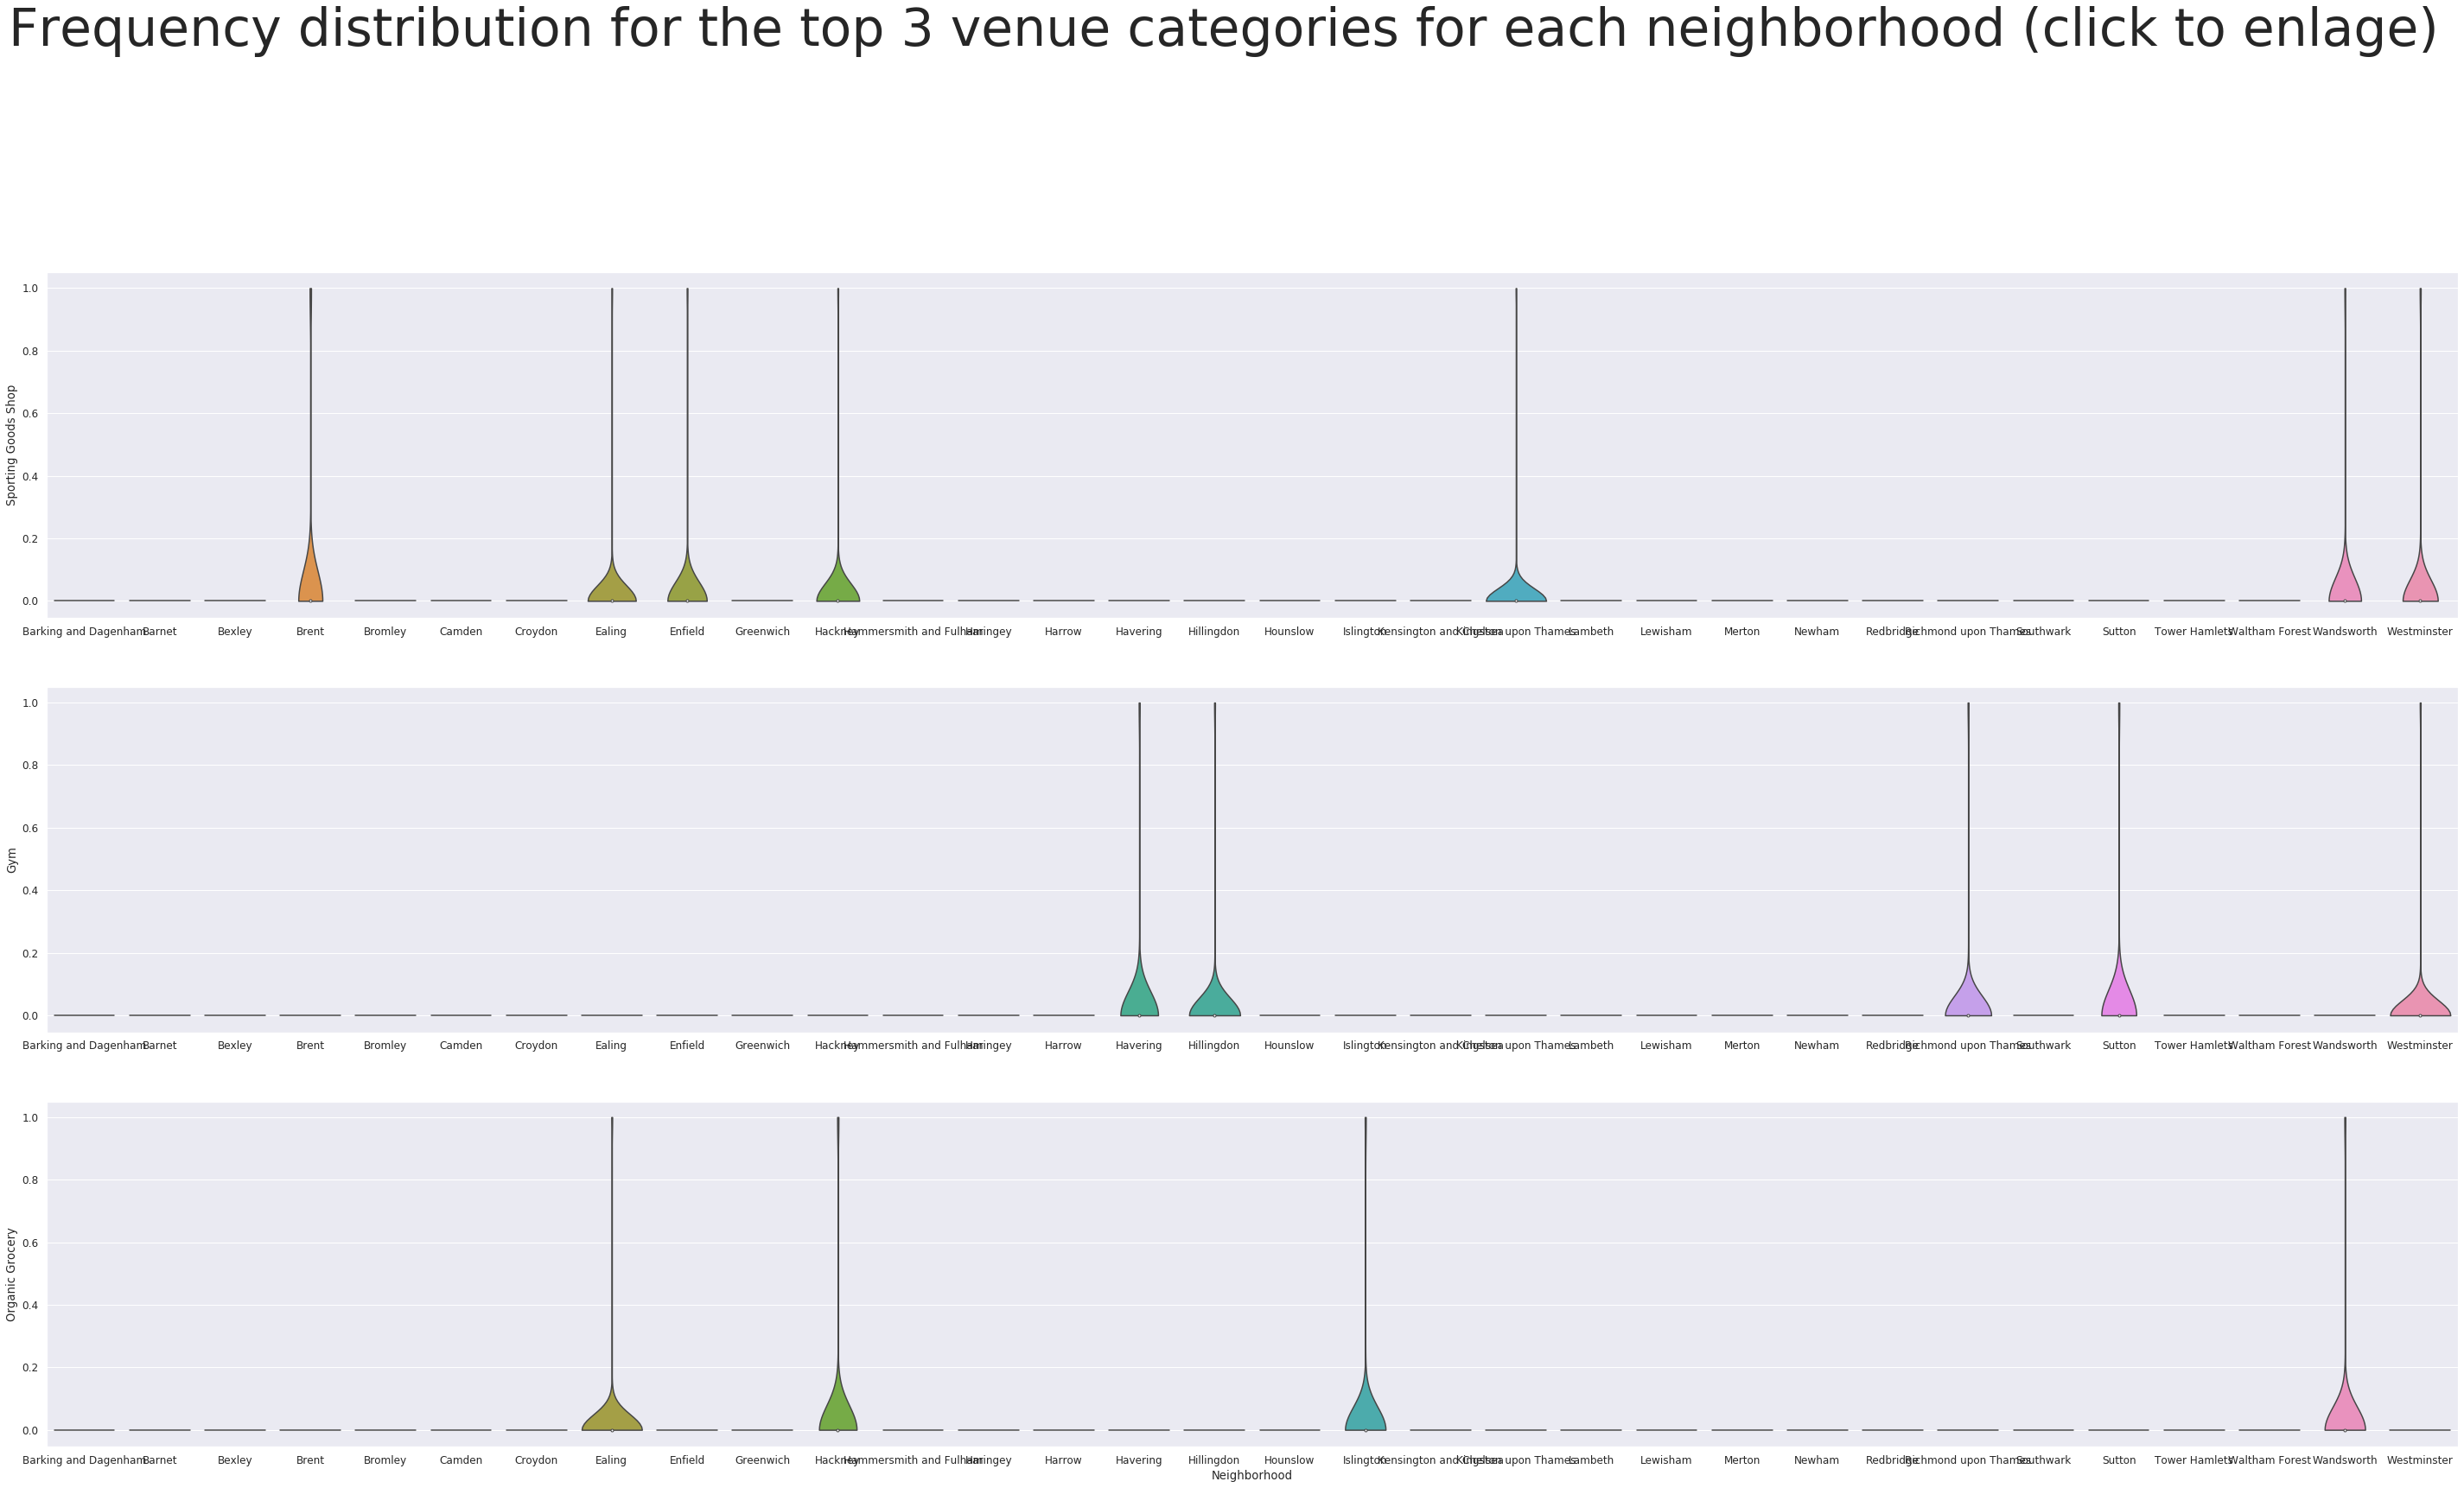

In [43]:
# Categorical plot
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns
import matplotlib.pyplot as plt
 

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="Sporting Goods Shop", data=London_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Gym", data=London_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Organic Grocery", data=London_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

The Neighborhoods
So as we can see from the analysis there are 2 neighborhoods to open new stores - according to the criteria that they have the 2 of the 3 specified venues in a great frequency (Gyms and Organic Grocery). They are as follows:

Neighborhoods
Wandsworth and Westminister



***So there are 2 neighborhoods that have a significant frequency density of targeted*** .

## Inferences and Discussion
## Chosen Neighborhoods - Results

## Let's look at the 2 Boroughs on a London map

In [46]:
# The csv of the 3 chosen prospective neighborhoods was uploaded to GitHub for access and reference
# Download and put into a new dataframe called chosen_districts

array = ['Wandsworth', 'Westminster']
chosen_districts = London.loc[London['BoroughName'].isin(array)]
chosen_districts


,BoroughName,Population,Latitude,Longitude
30,Wandsworth,310516,51.4567,-0.1910
31,Westminster,226841,51.4973,-0.1372


Where are our chosen districts? Let's visualise them on a map of Paris

In [47]:
# Create a folium map of Paris with the 3 neighborhoods superimposed on the map
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(chosen_districts['Latitude'], chosen_districts['Longitude'], chosen_districts['BoroughName']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=45,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

# Results
I guess it's not a surprise that these districts are all very centrally located in London. Locations fitting the criteria for popular venues would normally be in central locations in many cities of the world.

From this visualization it is clear that on a practical level, with no data to base decisions on, the circle of the 31 borough  is very large, and researching and then visiting them all would be a daunting and time consuming task. We have narrowed the search area to suit the client's retail business.

# Discussion
this is the initial recommendations look for the initial stores locations, however after the on ground research, we could learn of additional insights and relevance for target market which can be used to rerun this analysis with additional parameter and help to locate suitable venues for additional stores.

# Conclusions
we have narrowed down the target locations for the customer to carry out the on ground research to further help in pinpointing the location of new healthy nutrition stores.

Without leveraging data to make focused decisions, the process could have been drawn out and resulted in new stores opening in sub-standard areas for this retailer. Data has helped to provide a better strategy and way forward, these data-driven decisions will lead to a better solution in the end.

